In [1]:
# вычисление числовых характеристик

from scipy import *

# вычисление средней
m = mean( [1,2,3,4,5] )
print("mean = ",m)
# m = 3


# вычисление медианы
med = median( [1,1,1,1,5] )
print("me = ",med)


# стандартное отклонение
sd = std( [1,2,3,4,5] )
print("st = ", sd)


# квартили
q1 = percentile( [1,2,3,4,5], 25 )
q2 = percentile( [1,2,3,4,5], 50 )
q3 = percentile( [1,2,3,4,5], 75 )
print("q1 = ",q1)
print("q2 = ",q2)
print("q3 = ",q3)

mean =  3.0
me =  1.0
st =  1.4142135623730951
q1 =  2.0
q2 =  3.0
q3 =  4.0


# Создание случайных значений

Модуль scipy.stats содержит множество подмодулей, 
каждый из которых предназначен для работы с определённым распределением.

### Некоторые подмодули
`scipy.stats.uniforn` - равномерное распределение

`scipy.stats.norm` - номальное распределение

`scipy.stats.t` - распределение Стьюдента (t-распределение)

`scipy.stats.poisson` - распределение Пуассона


<br>

Эти подмодули имеют схожие функции для генерирования случайных значений - `rvs`.

Генерирование одного заначения СВ распределённой по стандартному нормальному закону:

`scipy.stats.norm.rvs()`

<br>

Различия в вызове функции rvs для кажого подмодуля - это различия 
в _параметрах распределений_.

Например равномерное распределение (uniform) имеет два параметра
определяющие минимальное и максимальное значение СВ.

Нормальное распределение имеет тоже два параметра, 
но это математическое ожидание и стандартное отклонение.


<br>
### Параметры функции rvs
функция rvs имеет три параметра которые и задают параметры распределения
эти параметры `loc, shape, scale`

какие из этих трёх параметров нужно задавать
и какой смысл они имеют напиано в документации к подмодулю

<br>
параметры указываются так:

`scipy.stats.norm.rvs(loc = 12.2)`


Для параметра `shape` приводится просто число:

`scipy.stats.norm.rvs(5.72)`

#### Пример
help( scipy.stats.norm )

>The location (loc) keyword specifies the mean.

> The scale (scale) keyword specifies the standard deviation.


loc - это математическое ожидание

sсale - стандартное отклонение


<br>
Отдельным параметром `size` задаётся количество значений СВ которые нужно сгенерировать

# Построение гистограмм

Для того чтобы построить гистограмму (или любой другой график) используется два модуля

`from matplotlib.pyplot import *`
`import seaborn as sns`

Второй модуль подключен под именем sns.

<br>
Для создания гистограммы используется функция `distplot` модуля `seaborn`:

`sns.distplot(X, kde = False, label = 'подпись')`


Функция принимает как минимум один параметр - набор значений случайной величины. Это первый параметр функции. В примере это - Х.

`sns.distplot(X)`


Автоматически строится и кривуя плотности распределения ($f(x)$). Чтобы её отключится нужжно задать значение параметру `kde = False`


<br>

Если нужно построить несколько гистограмм на одном графике, то нужно несколько раз вызвать функцию `distplot`

Чтобы отличать графику друг от друга используются подписи через параметр `label`

Пример:

`sns.distplot(X1, label = 'x1')`
`sns.distplot(X2, label = 'x2')`


Подписи к графикам нужно отдельно "включить" вызвав `legend()`

<br>
Наконец, чтобы показать картинку вызывается функция `show()`

Равномерное распределение
mean =  -0.015283494670552131
std =  57.73084877048404


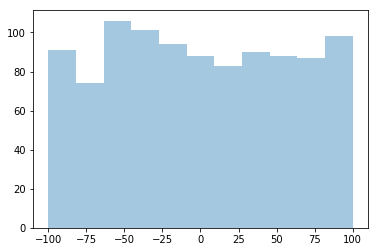

In [4]:
# генерирование случайных значений
import scipy.stats
# графики
from matplotlib.pyplot import *
import seaborn as sns

# включим отображение графиков прямо в блокноте, а не в отдельном окне
%matplotlib inline


print("Равномерное распределение")
# создание случаных значений (равномерное распределение)
# от -100 до 100 (-100+200)
# 100 - количество
Ud = scipy.stats.uniform.rvs(loc=-100, scale=200, size=1000)
print("mean = ", mean(Ud))
print("std = ", std(Ud))

# гистограмма
# kde - kernel density estimate 
# kde = True  - дополнительно построить кривую плостности
sns.distplot(Ud, kde = False)
show()

# в идеале должна получится ровная гистограмма
# однако такое возмодно только в пределе, 
# когда число значений стремится к безсконечности,
# а в примере их всего 1000

Нормальное распределение
mean =  4.082820270466444
std =  7.245312284714384


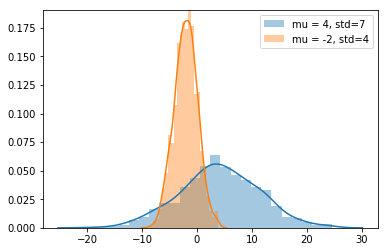

In [4]:
print("Нормальное распределение")
# m=4 - математическое ожидание
# sigma=7 - стандартное отклонение
Nd = scipy.stats.norm.rvs(loc=4, scale=7, size=1000)

Nd2 = scipy.stats.norm.rvs(loc=-2, scale=2, size=1000)
print("mean = ", mean(Nd))
print("std = ", std(Nd))
# гистограмма
sns.distplot(Nd, kde = True, label='mu = 4, std=7')
sns.distplot(Nd2, kde = True, label='mu = -2, std=4')
legend()
show()

Распределение Стьюдента
mean =  0.011647319516818863
std =  1.4648656007380747


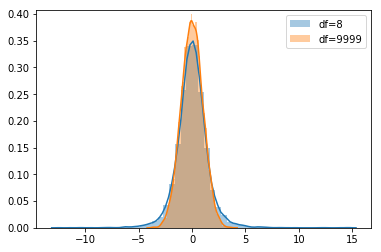

In [5]:
print("Распределение Стьюдента")
# shape = df - количество степеней свободы
Nd =  scipy.stats.t.rvs(4, size=10000)
Nd2 = scipy.stats.t.rvs(9999, size=10000)
print("mean = ", mean(Nd))
print("std = ", std(Nd))
# гистограмма
sns.distplot(Nd,  kde = True, label='df=8')
sns.distplot(Nd2, kde = True, label='df=9999')
legend()
show()

# чем меньше параметр df тем меньше распределение похоже на нормальное
# это хорошо заметно по "толстым хвостам"


Распределение Пуассона
mean =  2.9969
std =  1.733485041758365


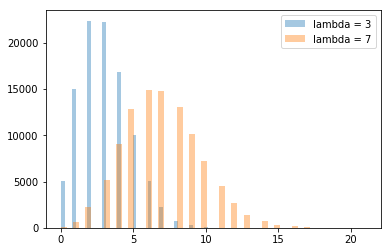

In [6]:
print()
print("Распределение Пуассона")
# lambda = 3 - математическое ожидание и дисперсия
Pd = scipy.stats.poisson.rvs(3, size=100000)
Pd2 = scipy.stats.poisson.rvs(7, size=100000)
print("mean = ", mean(Pd))
print("std = ", std(Pd))
# гистограмма
sns.distplot(Pd, kde = False, label = 'lambda = 3')
sns.distplot(Pd2, kde = False, label = 'lambda = 7')
legend()
show()

# математическое ожидание и дисперсия в распределении Пуассона совпадают 
# M = D
# ниже приведено стандартное отклонение - корень квадратный из дисперсии


Экпоненциальное распределение
mean =  2.492711215301253
std =  2.490085998885769


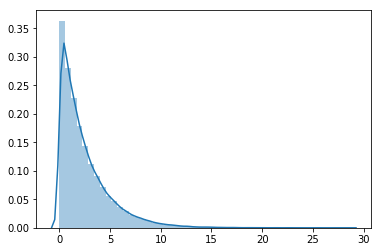

In [7]:
print()
print("Экпоненциальное распределение")
# 1/lambda = 2.5 - математическое ожидание
Ed = scipy.stats.expon.rvs(scale=2.5, size=100000)
print("mean = ", mean(Ed))
print("std = ", std(Ed))
# гистограмма
sns.distplot(Ed, kde = True)
show()

# В экпоненциальном распределении совпадают M и std